# Binary-Classify vertical flight profiles into developed & others

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dashlink/'

Mounted at /content/gdrive


In [0]:
from fastai.vision import *
import glob

In [8]:
#confirm we are in DASHlink
# !cd gdrive/"My Drive"/dashlink
!pwd

/content


In [9]:
!ls

gdrive	sample_data


In [10]:
# set inference folder
# infpath = Path(base_dir + 'Tail_687_3'); infpath
infpath = Path(base_dir + 'Test'); infpath

PosixPath('/content/gdrive/My Drive/dashlink/Test')

In [11]:
# set output folder
outpath = Path('png3'); outpath #for altitude line plots
# outpath = Path('png3b'); outpath #for Gramian Angular Summation Field (GASF)
# outpath = Path('png3c'); outpath #for Gramian Angular Difference Field (GADF)
# outpath = Path('png3d'); outpath #for Markov Transition Field (MTF)
# outpath = Path('png3e'); outpath #for Recurrence Plot (RP)
# outpath = Path('png3f'); outpath #for altitude area plots

PosixPath('png3')

## Setup input for **inference**

In [29]:
# clean input folder
!rm "{infpath}"/{outpath}/*.png

rm: cannot remove '/content/gdrive/My Drive/dashlink/Test/png3/*.png': No such file or directory


In [30]:
# srcpath = Path('src3_1'); srcpath
# srcpath = Path('src3_3'); srcpath
srcpath = Path('src3'); srcpath

PosixPath('src3')

In [32]:
! ls -l "{infpath}"/{srcpath}/*.png | wc -l

514


In [0]:
# cp Tail_687_3/src/*.png to Tail_687_3/png3
# !cp "{infpath}"/src/*.png "{infpath}"/{outpath}
!cp "{infpath}"/{srcpath}/*.png "{infpath}"/{outpath}

In [34]:
# ! ls -alh "{infpath}"/{outpath}
! ls -l "{infpath}"/{outpath}/*.png | wc -l

514


In [0]:
#if output dirs do not exist, create it
# (infpath/outpath/'typ').mkdir(parents=True, exist_ok=True)
# (infpath/outpath/'non').mkdir(parents=True, exist_ok=True)

In [36]:
! ls "{infpath}"/{outpath}/non/*.*

'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201040640-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201041640-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201051725-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201070932-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201181433-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201220811-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201221608-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200201271702-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200202031709-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200202041706-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200202061705-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200202091529-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/non/687200202101706-1min.png'
'/content/gdrive/My Drive

In [37]:
! ls "{infpath}"/{outpath}/typ/*.*

'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200112311614-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200112312147-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201010631-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201010908-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011045-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011305-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011535-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011743-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201020650-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201020851-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201021106-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201021404-1min.png'
'/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201021619-1min.png'
'/content/gdrive/My Drive

In [38]:
#remove all output files from outpath/non
! rm "{infpath}"/{outpath}/non/*.png
! ls "{infpath}"/{outpath}/non/*.*

ls: cannot access '/content/gdrive/My Drive/dashlink/Test/png3/non/*.*': No such file or directory


In [39]:
#remove all output files from outpath/typ
! rm "{infpath}"/{outpath}/typ/*.png
! ls "{infpath}"/{outpath}/typ/*.*

ls: cannot access '/content/gdrive/My Drive/dashlink/Test/png3/typ/*.*': No such file or directory


## Inference/Production

In [40]:
# trnpath = Path(base_dir + 'Tail_687_1'); trnpath
trnpath = Path(base_dir + 'Train'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Train')

In [43]:
#ensure export.pkl is in folder
##!ls {trnpath}/png1/export.pkl
!ls -lh "{trnpath}"/png3a/export.pkl

-rw------- 1 root root 99M Sep  9 21:09 '/content/gdrive/My Drive/dashlink/Train/png3a/export.pkl'


In [0]:
##learn = load_learner(trnpath/'png1')
learn = load_learner(trnpath/'png3a')

In [0]:
##img = open_image(infpath/'png1'/'687200203301816-1min.png'); img
# img = open_image(infpath/outpath/'687200203301816-1min.png'); img

In [0]:
# show_image(img)

In [0]:
# pred_class,pred_idx,outputs = learn.predict(img)
# pred_class,pred_idx,outputs

In [48]:
allFiles = glob.glob(str(infpath/outpath/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO PROCESS: {n}\n')
for i,file_ in enumerate(allFiles):
#     if i==20: break
        
    img = open_image(file_); #show_image(img)
    pred_class,pred_idx,outputs = learn.predict(img)

    print(file_)
    print('predicted class:', pred_class)
    
    if pred_class.obj=='typ':
        !mv "{file_}" "{infpath}"/{outpath}/typ
    else:
        !mv "{file_}" "{infpath}"/{outpath}/non
    
    print(f'{i+1} of {n} complete ........................\n')

TOTAL FILES TO PROCESS: 514

/content/gdrive/My Drive/dashlink/Test/png3/687200112311614-1min.png
predicted class: typ
1 of 514 complete ........................

/content/gdrive/My Drive/dashlink/Test/png3/687200112312147-1min.png
predicted class: typ
2 of 514 complete ........................

/content/gdrive/My Drive/dashlink/Test/png3/687200201010631-1min.png
predicted class: typ
3 of 514 complete ........................

/content/gdrive/My Drive/dashlink/Test/png3/687200201010908-1min.png
predicted class: typ
4 of 514 complete ........................

/content/gdrive/My Drive/dashlink/Test/png3/687200201011045-1min.png
predicted class: typ
5 of 514 complete ........................

/content/gdrive/My Drive/dashlink/Test/png3/687200201011305-1min.png
predicted class: typ
6 of 514 complete ........................

/content/gdrive/My Drive/dashlink/Test/png3/687200201011535-1min.png
predicted class: typ
7 of 514 complete ........................

/content/gdrive/My Drive/dashlink

In [0]:
from IPython.display import Image, display

TOTAL FILES TO SHOW IN typ FOLDER: 480



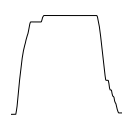

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200112311614-1min.png
1 of 480 complete ........................



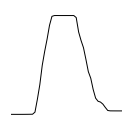

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200112312147-1min.png
2 of 480 complete ........................



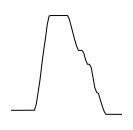

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201010631-1min.png
3 of 480 complete ........................



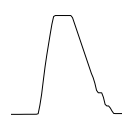

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201010908-1min.png
4 of 480 complete ........................



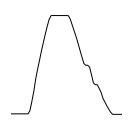

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011045-1min.png
5 of 480 complete ........................



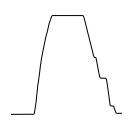

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011305-1min.png
6 of 480 complete ........................



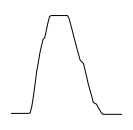

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011535-1min.png
7 of 480 complete ........................



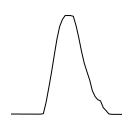

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201011743-1min.png
8 of 480 complete ........................



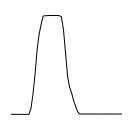

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201020650-1min.png
9 of 480 complete ........................



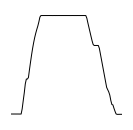

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201020851-1min.png
10 of 480 complete ........................



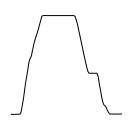

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201021106-1min.png
11 of 480 complete ........................



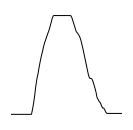

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201021404-1min.png
12 of 480 complete ........................



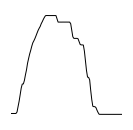

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201021619-1min.png
13 of 480 complete ........................



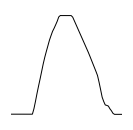

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201021953-1min.png
14 of 480 complete ........................



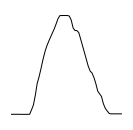

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201031028-1min.png
15 of 480 complete ........................



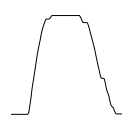

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201031600-1min.png
16 of 480 complete ........................



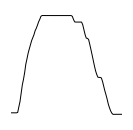

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201040731-1min.png
17 of 480 complete ........................



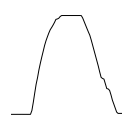

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201040940-1min.png
18 of 480 complete ........................



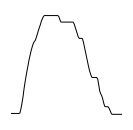

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201041156-1min.png
19 of 480 complete ........................



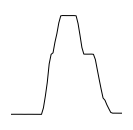

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201041505-1min.png
20 of 480 complete ........................



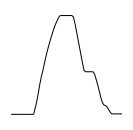

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201041859-1min.png
21 of 480 complete ........................



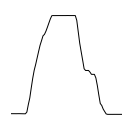

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201050358-1min.png
22 of 480 complete ........................



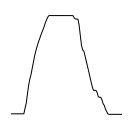

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201050550-1min.png
23 of 480 complete ........................



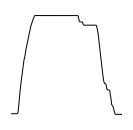

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201050834-1min.png
24 of 480 complete ........................



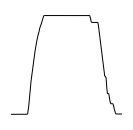

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201051328-1min.png
25 of 480 complete ........................



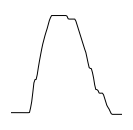

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201060431-1min.png
26 of 480 complete ........................



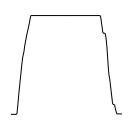

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201060835-1min.png
27 of 480 complete ........................



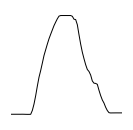

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201061243-1min.png
28 of 480 complete ........................



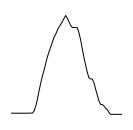

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201061527-1min.png
29 of 480 complete ........................



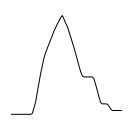

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201061738-1min.png
30 of 480 complete ........................



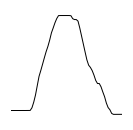

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201070541-1min.png
31 of 480 complete ........................



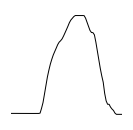

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201070816-1min.png
32 of 480 complete ........................



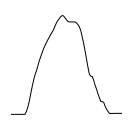

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201071024-1min.png
33 of 480 complete ........................



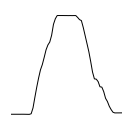

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201071247-1min.png
34 of 480 complete ........................



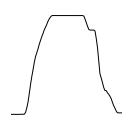

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201071435-1min.png
35 of 480 complete ........................



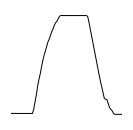

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201071746-1min.png
36 of 480 complete ........................



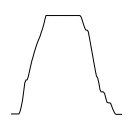

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201080511-1min.png
37 of 480 complete ........................



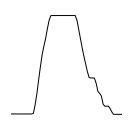

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201080748-1min.png
38 of 480 complete ........................



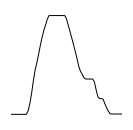

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201080940-1min.png
39 of 480 complete ........................



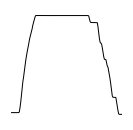

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201081200-1min.png
40 of 480 complete ........................



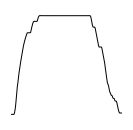

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201081501-1min.png
41 of 480 complete ........................



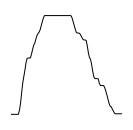

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201090600-1min.png
42 of 480 complete ........................



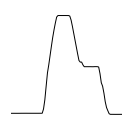

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201090842-1min.png
43 of 480 complete ........................



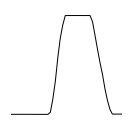

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201091124-1min.png
44 of 480 complete ........................



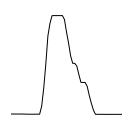

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201091243-1min.png
45 of 480 complete ........................



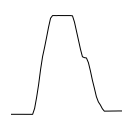

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201091434-1min.png
46 of 480 complete ........................



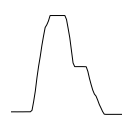

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201091630-1min.png
47 of 480 complete ........................



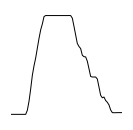

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201091935-1min.png
48 of 480 complete ........................



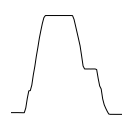

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201100718-1min.png
49 of 480 complete ........................



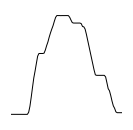

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201100937-1min.png
50 of 480 complete ........................



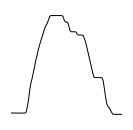

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201101153-1min.png
51 of 480 complete ........................



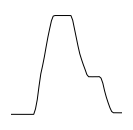

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201101447-1min.png
52 of 480 complete ........................



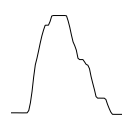

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201101628-1min.png
53 of 480 complete ........................



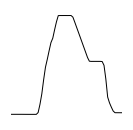

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201101850-1min.png
54 of 480 complete ........................



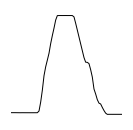

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201110719-1min.png
55 of 480 complete ........................



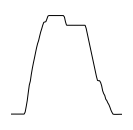

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201110940-1min.png
56 of 480 complete ........................



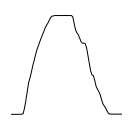

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201111202-1min.png
57 of 480 complete ........................



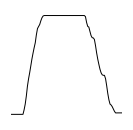

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201111508-1min.png
58 of 480 complete ........................



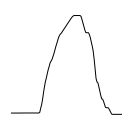

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201120648-1min.png
59 of 480 complete ........................



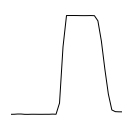

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201120951-1min.png
60 of 480 complete ........................



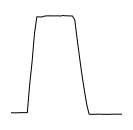

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201121113-1min.png
61 of 480 complete ........................



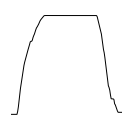

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201121251-1min.png
62 of 480 complete ........................



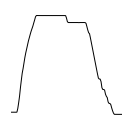

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201121632-1min.png
63 of 480 complete ........................



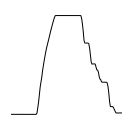

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201130552-1min.png
64 of 480 complete ........................



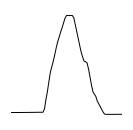

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201130841-1min.png
65 of 480 complete ........................



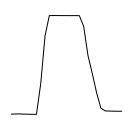

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201131033-1min.png
66 of 480 complete ........................



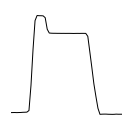

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201131125-1min.png
67 of 480 complete ........................



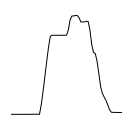

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201131249-1min.png
68 of 480 complete ........................



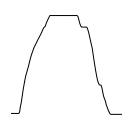

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201131423-1min.png
69 of 480 complete ........................



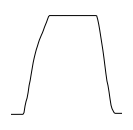

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201131744-1min.png
70 of 480 complete ........................



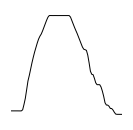

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201140505-1min.png
71 of 480 complete ........................



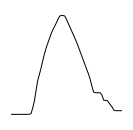

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201140746-1min.png
72 of 480 complete ........................



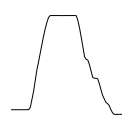

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201141015-1min.png
73 of 480 complete ........................



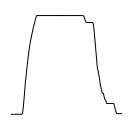

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201141306-1min.png
74 of 480 complete ........................



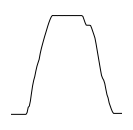

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201141724-1min.png
75 of 480 complete ........................



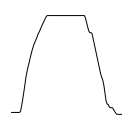

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201141928-1min.png
76 of 480 complete ........................



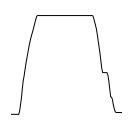

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201150336-1min.png
77 of 480 complete ........................



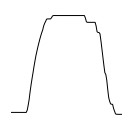

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201150645-1min.png
78 of 480 complete ........................



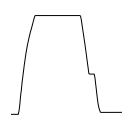

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201150930-1min.png
79 of 480 complete ........................



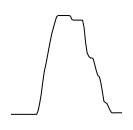

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201151245-1min.png
80 of 480 complete ........................



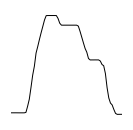

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201151440-1min.png
81 of 480 complete ........................



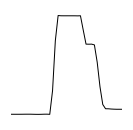

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201151704-1min.png
82 of 480 complete ........................



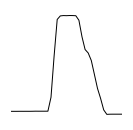

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201160608-1min.png
83 of 480 complete ........................



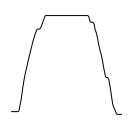

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201160724-1min.png
84 of 480 complete ........................



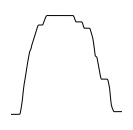

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201160946-1min.png
85 of 480 complete ........................



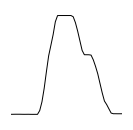

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201161248-1min.png
86 of 480 complete ........................



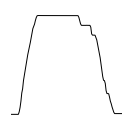

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201161418-1min.png
87 of 480 complete ........................



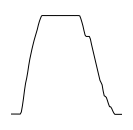

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201170559-1min.png
88 of 480 complete ........................



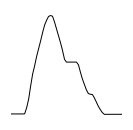

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201170901-1min.png
89 of 480 complete ........................



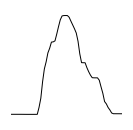

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201180640-1min.png
90 of 480 complete ........................



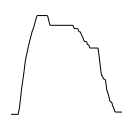

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201180944-1min.png
91 of 480 complete ........................



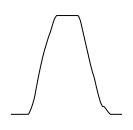

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201181304-1min.png
92 of 480 complete ........................



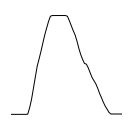

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201190346-1min.png
93 of 480 complete ........................



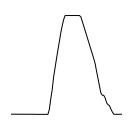

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201190606-1min.png
94 of 480 complete ........................



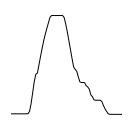

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201190801-1min.png
95 of 480 complete ........................



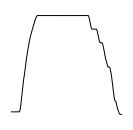

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201191142-1min.png
96 of 480 complete ........................



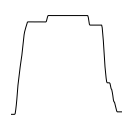

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201191504-1min.png
97 of 480 complete ........................



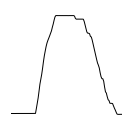

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201201740-1min.png
98 of 480 complete ........................



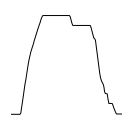

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201210617-1min.png
99 of 480 complete ........................



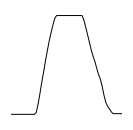

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201210904-1min.png
100 of 480 complete ........................



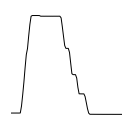

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201211040-1min.png
101 of 480 complete ........................



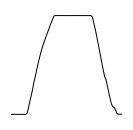

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201211346-1min.png
102 of 480 complete ........................



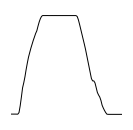

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201211559-1min.png
103 of 480 complete ........................



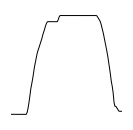

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201211951-1min.png
104 of 480 complete ........................



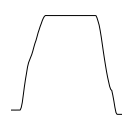

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201220540-1min.png
105 of 480 complete ........................



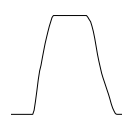

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201220843-1min.png
106 of 480 complete ........................



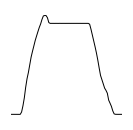

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201221036-1min.png
107 of 480 complete ........................



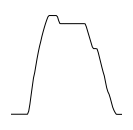

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201221351-1min.png
108 of 480 complete ........................



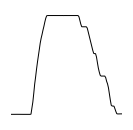

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201230548-1min.png
109 of 480 complete ........................



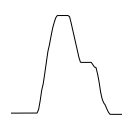

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201230839-1min.png
110 of 480 complete ........................



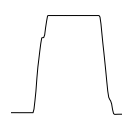

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201231123-1min.png
111 of 480 complete ........................



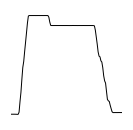

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201231356-1min.png
112 of 480 complete ........................



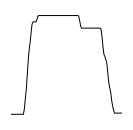

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201231630-1min.png
113 of 480 complete ........................



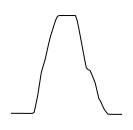

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201240658-1min.png
114 of 480 complete ........................



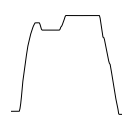

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201241144-1min.png
115 of 480 complete ........................



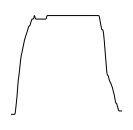

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201241454-1min.png
116 of 480 complete ........................



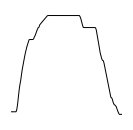

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201251126-1min.png
117 of 480 complete ........................



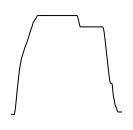

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201251428-1min.png
118 of 480 complete ........................



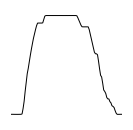

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201260548-1min.png
119 of 480 complete ........................



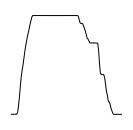

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201260946-1min.png
120 of 480 complete ........................



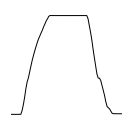

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201261351-1min.png
121 of 480 complete ........................



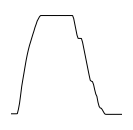

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201261613-1min.png
122 of 480 complete ........................



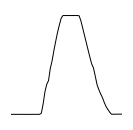

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201270605-1min.png
123 of 480 complete ........................



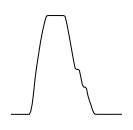

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201270759-1min.png
124 of 480 complete ........................



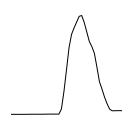

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201270956-1min.png
125 of 480 complete ........................



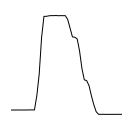

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201271117-1min.png
126 of 480 complete ........................



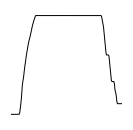

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201271252-1min.png
127 of 480 complete ........................



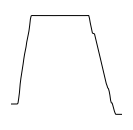

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201281551-1min.png
128 of 480 complete ........................



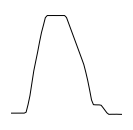

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201282051-1min.png
129 of 480 complete ........................



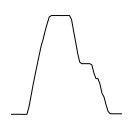

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201290347-1min.png
130 of 480 complete ........................



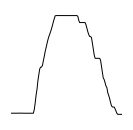

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201290549-1min.png
131 of 480 complete ........................



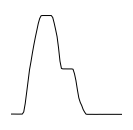

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201290842-1min.png
132 of 480 complete ........................



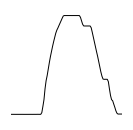

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201291042-1min.png
133 of 480 complete ........................



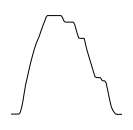

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201291246-1min.png
134 of 480 complete ........................



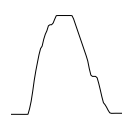

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201291828-1min.png
135 of 480 complete ........................



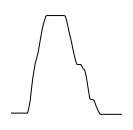

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201300721-1min.png
136 of 480 complete ........................



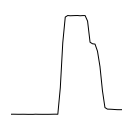

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201300952-1min.png
137 of 480 complete ........................



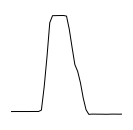

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201301118-1min.png
138 of 480 complete ........................



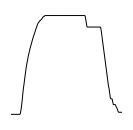

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201301254-1min.png
139 of 480 complete ........................



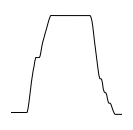

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201301628-1min.png
140 of 480 complete ........................



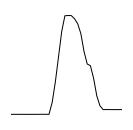

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200201301941-1min.png
141 of 480 complete ........................



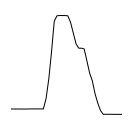

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202010536-1min.png
142 of 480 complete ........................



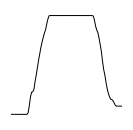

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202010807-1min.png
143 of 480 complete ........................



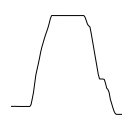

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202011103-1min.png
144 of 480 complete ........................



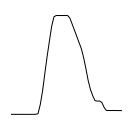

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202011352-1min.png
145 of 480 complete ........................



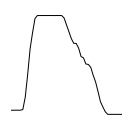

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202011515-1min.png
146 of 480 complete ........................



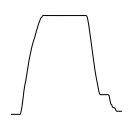

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202011956-1min.png
147 of 480 complete ........................



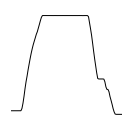

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202020549-1min.png
148 of 480 complete ........................



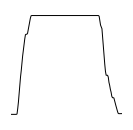

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202020908-1min.png
149 of 480 complete ........................



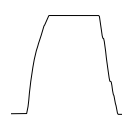

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202021211-1min.png
150 of 480 complete ........................



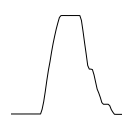

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202021529-1min.png
151 of 480 complete ........................



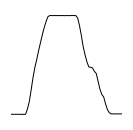

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202021703-1min.png
152 of 480 complete ........................



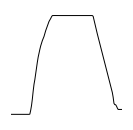

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202021952-1min.png
153 of 480 complete ........................



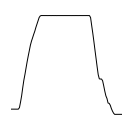

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202030548-1min.png
154 of 480 complete ........................



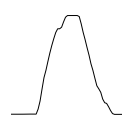

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202030901-1min.png
155 of 480 complete ........................



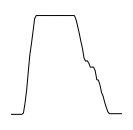

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202031038-1min.png
156 of 480 complete ........................



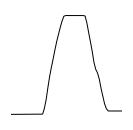

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202031302-1min.png
157 of 480 complete ........................



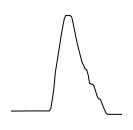

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202031453-1min.png
158 of 480 complete ........................



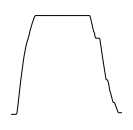

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202040415-1min.png
159 of 480 complete ........................



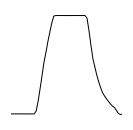

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202040752-1min.png
160 of 480 complete ........................



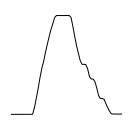

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202040948-1min.png
161 of 480 complete ........................



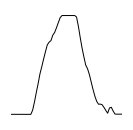

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202041135-1min.png
162 of 480 complete ........................



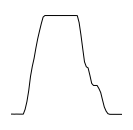

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202041316-1min.png
163 of 480 complete ........................



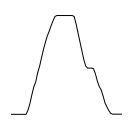

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202041529-1min.png
164 of 480 complete ........................



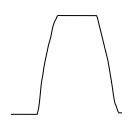

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202061155-1min.png
165 of 480 complete ........................



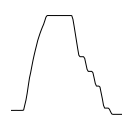

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202061438-1min.png
166 of 480 complete ........................



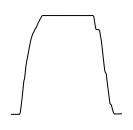

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202070425-1min.png
167 of 480 complete ........................



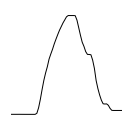

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202070802-1min.png
168 of 480 complete ........................



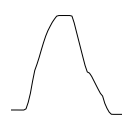

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202071011-1min.png
169 of 480 complete ........................



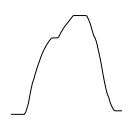

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202071302-1min.png
170 of 480 complete ........................



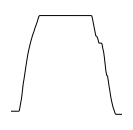

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202071534-1min.png
171 of 480 complete ........................



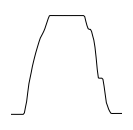

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202071826-1min.png
172 of 480 complete ........................



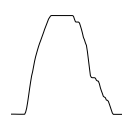

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202080707-1min.png
173 of 480 complete ........................



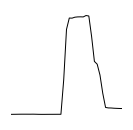

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202081137-1min.png
174 of 480 complete ........................



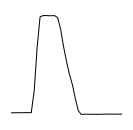

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202081251-1min.png
175 of 480 complete ........................



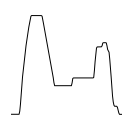

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202081442-1min.png
176 of 480 complete ........................



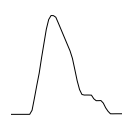

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202081803-1min.png
177 of 480 complete ........................



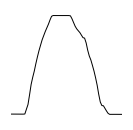

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202081922-1min.png
178 of 480 complete ........................



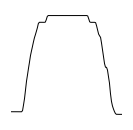

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202090643-1min.png
179 of 480 complete ........................



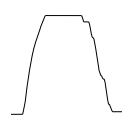

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202090932-1min.png
180 of 480 complete ........................



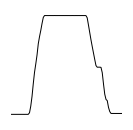

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202091310-1min.png
181 of 480 complete ........................



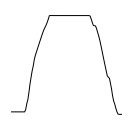

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202091826-1min.png
182 of 480 complete ........................



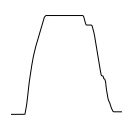

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202100332-1min.png
183 of 480 complete ........................



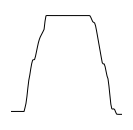

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202100643-1min.png
184 of 480 complete ........................



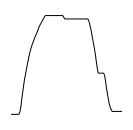

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202100953-1min.png
185 of 480 complete ........................



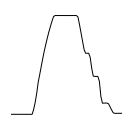

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202101252-1min.png
186 of 480 complete ........................



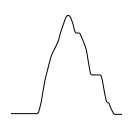

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202101442-1min.png
187 of 480 complete ........................



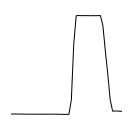

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202101759-1min.png
188 of 480 complete ........................



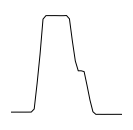

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202110618-1min.png
189 of 480 complete ........................



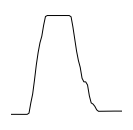

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202110804-1min.png
190 of 480 complete ........................



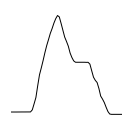

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202111020-1min.png
191 of 480 complete ........................



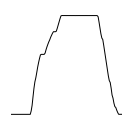

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202111254-1min.png
192 of 480 complete ........................



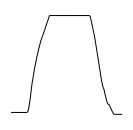

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202111843-1min.png
193 of 480 complete ........................



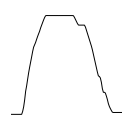

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202120327-1min.png
194 of 480 complete ........................



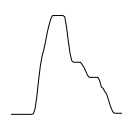

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202120641-1min.png
195 of 480 complete ........................



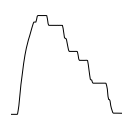

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202120943-1min.png
196 of 480 complete ........................



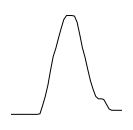

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202121403-1min.png
197 of 480 complete ........................



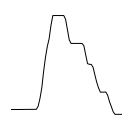

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202121514-1min.png
198 of 480 complete ........................



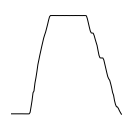

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202121737-1min.png
199 of 480 complete ........................



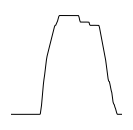

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202130619-1min.png
200 of 480 complete ........................



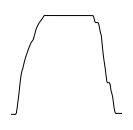

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202130953-1min.png
201 of 480 complete ........................



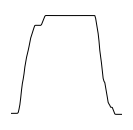

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202131239-1min.png
202 of 480 complete ........................



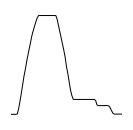

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202131623-1min.png
203 of 480 complete ........................



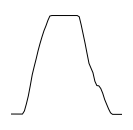

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202131823-1min.png
204 of 480 complete ........................



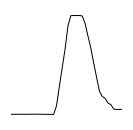

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202131953-1min.png
205 of 480 complete ........................



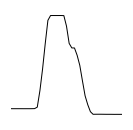

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202140537-1min.png
206 of 480 complete ........................



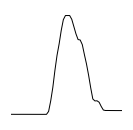

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202140813-1min.png
207 of 480 complete ........................



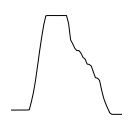

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202140934-1min.png
208 of 480 complete ........................



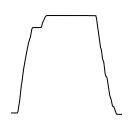

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202141138-1min.png
209 of 480 complete ........................



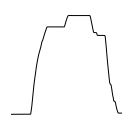

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202141501-1min.png
210 of 480 complete ........................



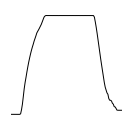

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202141954-1min.png
211 of 480 complete ........................



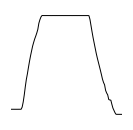

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202150552-1min.png
212 of 480 complete ........................



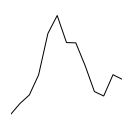

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202150831-1min.png
213 of 480 complete ........................



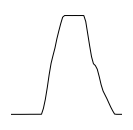

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202150903-1min.png
214 of 480 complete ........................



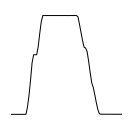

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202151039-1min.png
215 of 480 complete ........................



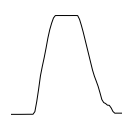

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202151247-1min.png
216 of 480 complete ........................



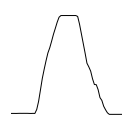

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202151440-1min.png
217 of 480 complete ........................



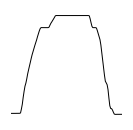

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202151705-1min.png
218 of 480 complete ........................



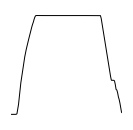

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202160417-1min.png
219 of 480 complete ........................



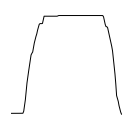

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202160908-1min.png
220 of 480 complete ........................



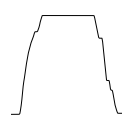

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202161201-1min.png
221 of 480 complete ........................



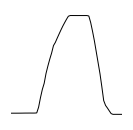

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202161530-1min.png
222 of 480 complete ........................



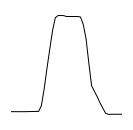

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202162049-1min.png
223 of 480 complete ........................



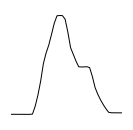

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202170527-1min.png
224 of 480 complete ........................



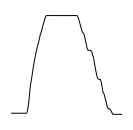

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202170646-1min.png
225 of 480 complete ........................



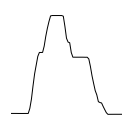

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202170913-1min.png
226 of 480 complete ........................



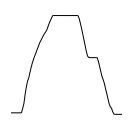

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202171113-1min.png
227 of 480 complete ........................



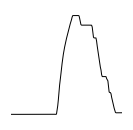

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202171332-1min.png
228 of 480 complete ........................



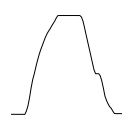

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202171714-1min.png
229 of 480 complete ........................



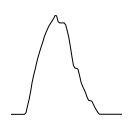

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202180558-1min.png
230 of 480 complete ........................



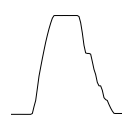

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202180755-1min.png
231 of 480 complete ........................



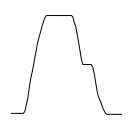

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202181117-1min.png
232 of 480 complete ........................



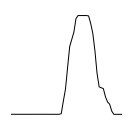

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202181308-1min.png
233 of 480 complete ........................



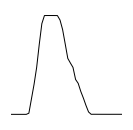

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202181433-1min.png
234 of 480 complete ........................



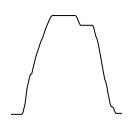

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200202181627-1min.png
235 of 480 complete ........................



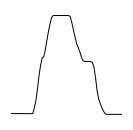

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203050430-1min.png
236 of 480 complete ........................



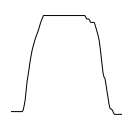

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203050644-1min.png
237 of 480 complete ........................



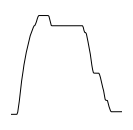

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203050934-1min.png
238 of 480 complete ........................



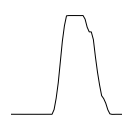

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203051306-1min.png
239 of 480 complete ........................



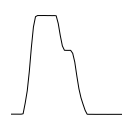

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203051432-1min.png
240 of 480 complete ........................



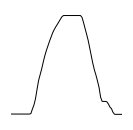

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203051629-1min.png
241 of 480 complete ........................



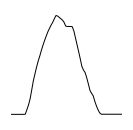

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203060603-1min.png
242 of 480 complete ........................



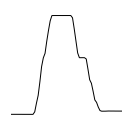

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203060803-1min.png
243 of 480 complete ........................



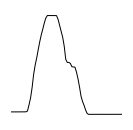

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203061022-1min.png
244 of 480 complete ........................



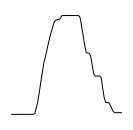

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203061244-1min.png
245 of 480 complete ........................



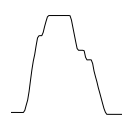

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203061433-1min.png
246 of 480 complete ........................



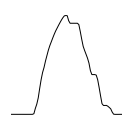

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203061630-1min.png
247 of 480 complete ........................



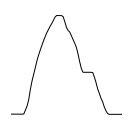

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203070431-1min.png
248 of 480 complete ........................



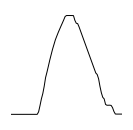

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203070650-1min.png
249 of 480 complete ........................



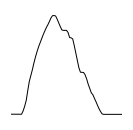

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203070852-1min.png
250 of 480 complete ........................



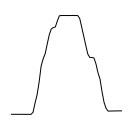

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203071107-1min.png
251 of 480 complete ........................



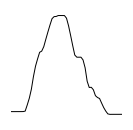

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203071244-1min.png
252 of 480 complete ........................



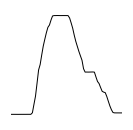

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203071439-1min.png
253 of 480 complete ........................



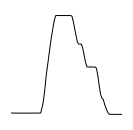

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203071626-1min.png
254 of 480 complete ........................



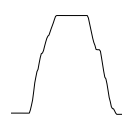

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203071844-1min.png
255 of 480 complete ........................



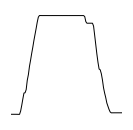

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203080620-1min.png
256 of 480 complete ........................



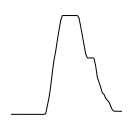

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203081110-1min.png
257 of 480 complete ........................



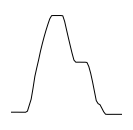

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203081243-1min.png
258 of 480 complete ........................



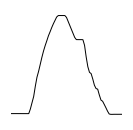

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203081442-1min.png
259 of 480 complete ........................



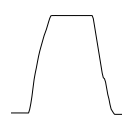

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203081850-1min.png
260 of 480 complete ........................



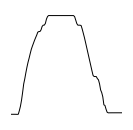

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203090628-1min.png
261 of 480 complete ........................



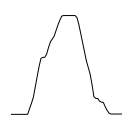

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203090928-1min.png
262 of 480 complete ........................



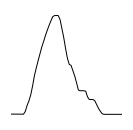

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203091104-1min.png
263 of 480 complete ........................



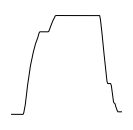

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203091258-1min.png
264 of 480 complete ........................



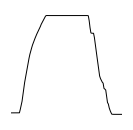

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203091633-1min.png
265 of 480 complete ........................



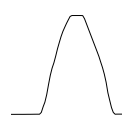

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203092042-1min.png
266 of 480 complete ........................



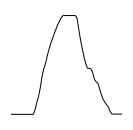

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203100803-1min.png
267 of 480 complete ........................



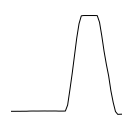

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203100956-1min.png
268 of 480 complete ........................



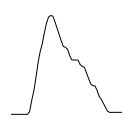

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203101120-1min.png
269 of 480 complete ........................



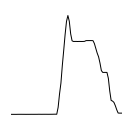

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203101250-1min.png
270 of 480 complete ........................



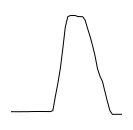

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203102058-1min.png
271 of 480 complete ........................



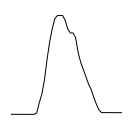

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203110532-1min.png
272 of 480 complete ........................



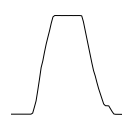

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203110754-1min.png
273 of 480 complete ........................



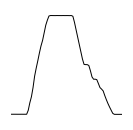

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203110949-1min.png
274 of 480 complete ........................



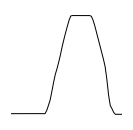

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203111135-1min.png
275 of 480 complete ........................



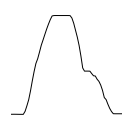

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203111320-1min.png
276 of 480 complete ........................



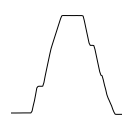

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203111540-1min.png
277 of 480 complete ........................



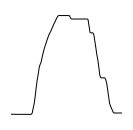

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203111808-1min.png
278 of 480 complete ........................



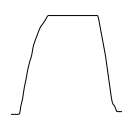

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203112035-1min.png
279 of 480 complete ........................



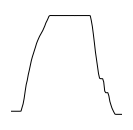

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203120545-1min.png
280 of 480 complete ........................



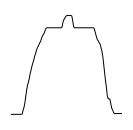

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203120913-1min.png
281 of 480 complete ........................



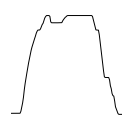

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203121205-1min.png
282 of 480 complete ........................



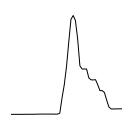

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203121543-1min.png
283 of 480 complete ........................



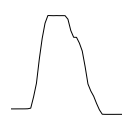

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203121659-1min.png
284 of 480 complete ........................



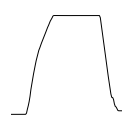

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203121959-1min.png
285 of 480 complete ........................



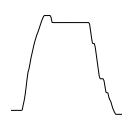

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203130545-1min.png
286 of 480 complete ........................



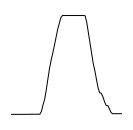

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203130915-1min.png
287 of 480 complete ........................



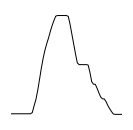

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203131045-1min.png
288 of 480 complete ........................



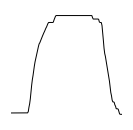

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203131217-1min.png
289 of 480 complete ........................



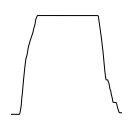

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203131528-1min.png
290 of 480 complete ........................



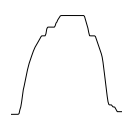

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203131950-1min.png
291 of 480 complete ........................



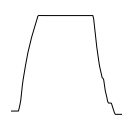

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203140535-1min.png
292 of 480 complete ........................



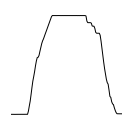

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203140913-1min.png
293 of 480 complete ........................



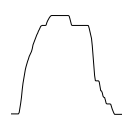

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203141154-1min.png
294 of 480 complete ........................



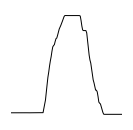

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203141535-1min.png
295 of 480 complete ........................



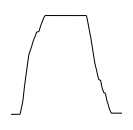

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203141820-1min.png
296 of 480 complete ........................



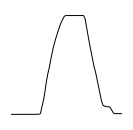

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203142127-1min.png
297 of 480 complete ........................



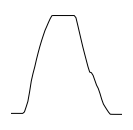

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203150516-1min.png
298 of 480 complete ........................



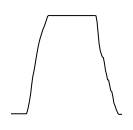

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203151024-1min.png
299 of 480 complete ........................



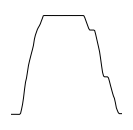

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203151241-1min.png
300 of 480 complete ........................



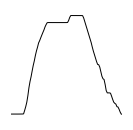

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203151546-1min.png
301 of 480 complete ........................



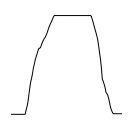

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203160634-1min.png
302 of 480 complete ........................



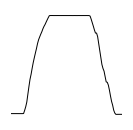

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203160929-1min.png
303 of 480 complete ........................



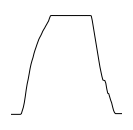

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203161151-1min.png
304 of 480 complete ........................



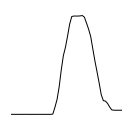

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203161413-1min.png
305 of 480 complete ........................



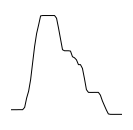

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203161527-1min.png
306 of 480 complete ........................



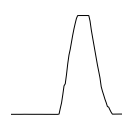

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203161750-1min.png
307 of 480 complete ........................



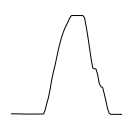

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203170603-1min.png
308 of 480 complete ........................



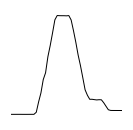

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203170757-1min.png
309 of 480 complete ........................



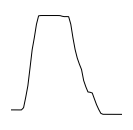

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203170926-1min.png
310 of 480 complete ........................



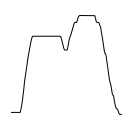

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203171133-1min.png
311 of 480 complete ........................



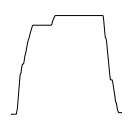

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203171447-1min.png
312 of 480 complete ........................



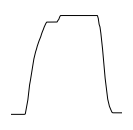

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203171833-1min.png
313 of 480 complete ........................



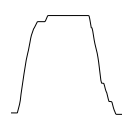

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203180624-1min.png
314 of 480 complete ........................



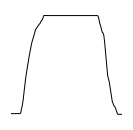

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203180926-1min.png
315 of 480 complete ........................



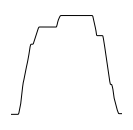

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203181220-1min.png
316 of 480 complete ........................



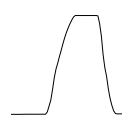

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203181554-1min.png
317 of 480 complete ........................



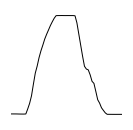

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203181716-1min.png
318 of 480 complete ........................



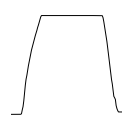

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203181943-1min.png
319 of 480 complete ........................



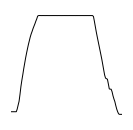

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203190532-1min.png
320 of 480 complete ........................



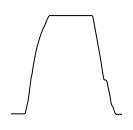

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203190920-1min.png
321 of 480 complete ........................



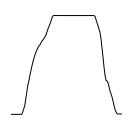

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203191152-1min.png
322 of 480 complete ........................



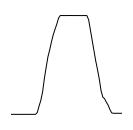

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203191524-1min.png
323 of 480 complete ........................



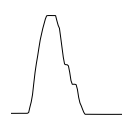

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203191702-1min.png
324 of 480 complete ........................



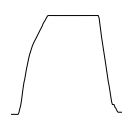

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203191944-1min.png
325 of 480 complete ........................



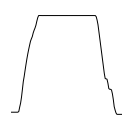

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203200526-1min.png
326 of 480 complete ........................



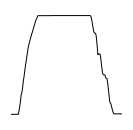

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203201004-1min.png
327 of 480 complete ........................



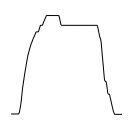

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203201331-1min.png
328 of 480 complete ........................



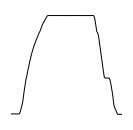

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203201713-1min.png
329 of 480 complete ........................



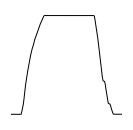

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203210420-1min.png
330 of 480 complete ........................



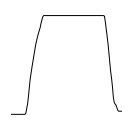

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203210750-1min.png
331 of 480 complete ........................



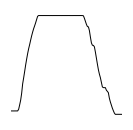

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203211026-1min.png
332 of 480 complete ........................



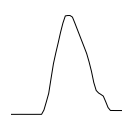

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203211449-1min.png
333 of 480 complete ........................



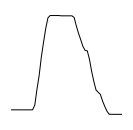

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203211556-1min.png
334 of 480 complete ........................



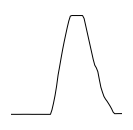

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203211750-1min.png
335 of 480 complete ........................



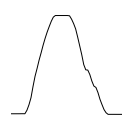

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203220533-1min.png
336 of 480 complete ........................



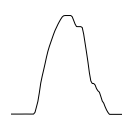

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203220753-1min.png
337 of 480 complete ........................



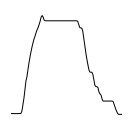

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203220943-1min.png
338 of 480 complete ........................



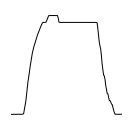

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203221312-1min.png
339 of 480 complete ........................



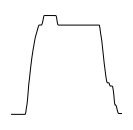

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203230830-1min.png
340 of 480 complete ........................



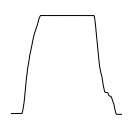

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203231301-1min.png
341 of 480 complete ........................



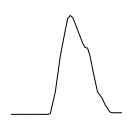

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203231950-1min.png
342 of 480 complete ........................



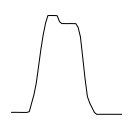

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203240431-1min.png
343 of 480 complete ........................



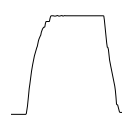

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203240652-1min.png
344 of 480 complete ........................



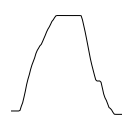

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203241032-1min.png
345 of 480 complete ........................



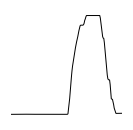

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203241237-1min.png
346 of 480 complete ........................



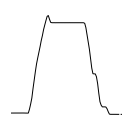

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203241900-1min.png
347 of 480 complete ........................



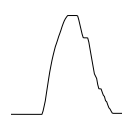

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203250606-1min.png
348 of 480 complete ........................



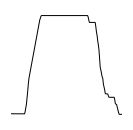

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203250829-1min.png
349 of 480 complete ........................



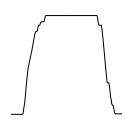

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203251356-1min.png
350 of 480 complete ........................



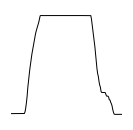

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203261300-1min.png
351 of 480 complete ........................



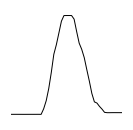

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203261945-1min.png
352 of 480 complete ........................



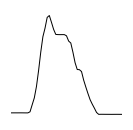

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203270425-1min.png
353 of 480 complete ........................



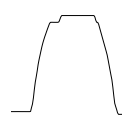

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203270640-1min.png
354 of 480 complete ........................



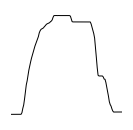

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203270937-1min.png
355 of 480 complete ........................



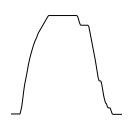

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203271254-1min.png
356 of 480 complete ........................



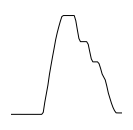

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203271859-1min.png
357 of 480 complete ........................



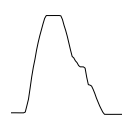

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203280437-1min.png
358 of 480 complete ........................



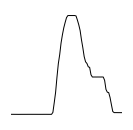

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203280646-1min.png
359 of 480 complete ........................



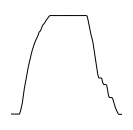

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203280952-1min.png
360 of 480 complete ........................



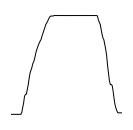

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203281223-1min.png
361 of 480 complete ........................



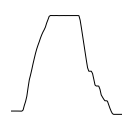

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203281449-1min.png
362 of 480 complete ........................



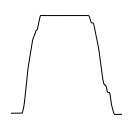

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203281723-1min.png
363 of 480 complete ........................



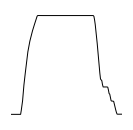

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203290437-1min.png
364 of 480 complete ........................



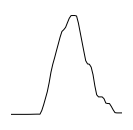

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203290814-1min.png
365 of 480 complete ........................



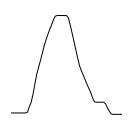

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203291030-1min.png
366 of 480 complete ........................



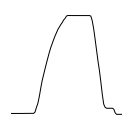

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203291407-1min.png
367 of 480 complete ........................



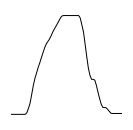

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203291540-1min.png
368 of 480 complete ........................



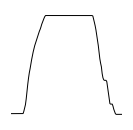

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203291722-1min.png
369 of 480 complete ........................



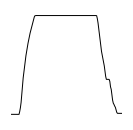

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203300432-1min.png
370 of 480 complete ........................



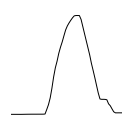

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203300818-1min.png
371 of 480 complete ........................



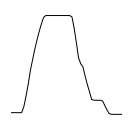

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203301031-1min.png
372 of 480 complete ........................



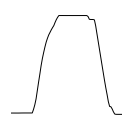

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203301816-1min.png
373 of 480 complete ........................



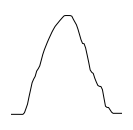

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203310506-1min.png
374 of 480 complete ........................



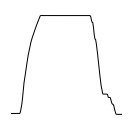

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203310729-1min.png
375 of 480 complete ........................



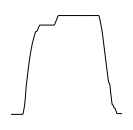

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203311400-1min.png
376 of 480 complete ........................



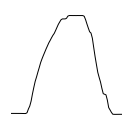

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200203311801-1min.png
377 of 480 complete ........................



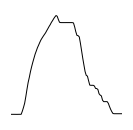

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204010459-1min.png
378 of 480 complete ........................



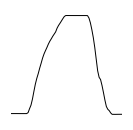

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204010817-1min.png
379 of 480 complete ........................



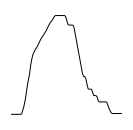

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204011007-1min.png
380 of 480 complete ........................



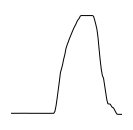

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204011305-1min.png
381 of 480 complete ........................



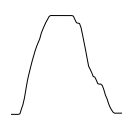

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204011509-1min.png
382 of 480 complete ........................



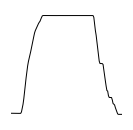

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204011718-1min.png
383 of 480 complete ........................



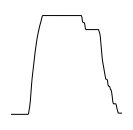

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204020433-1min.png
384 of 480 complete ........................



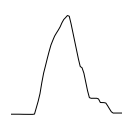

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204020813-1min.png
385 of 480 complete ........................



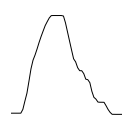

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204021029-1min.png
386 of 480 complete ........................



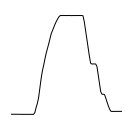

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204021241-1min.png
387 of 480 complete ........................



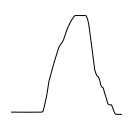

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204021439-1min.png
388 of 480 complete ........................



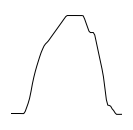

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204021819-1min.png
389 of 480 complete ........................



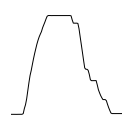

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204030448-1min.png
390 of 480 complete ........................



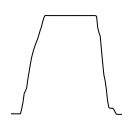

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204030647-1min.png
391 of 480 complete ........................



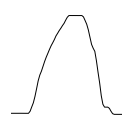

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204231253-1min.png
392 of 480 complete ........................



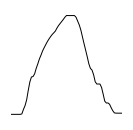

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204231441-1min.png
393 of 480 complete ........................



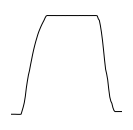

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204231658-1min.png
394 of 480 complete ........................



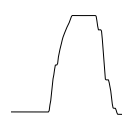

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204240520-1min.png
395 of 480 complete ........................



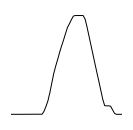

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204240828-1min.png
396 of 480 complete ........................



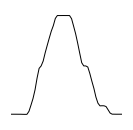

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204241039-1min.png
397 of 480 complete ........................



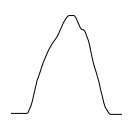

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204241257-1min.png
398 of 480 complete ........................



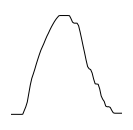

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204241446-1min.png
399 of 480 complete ........................



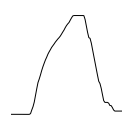

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204241739-1min.png
400 of 480 complete ........................



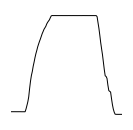

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204250732-1min.png
401 of 480 complete ........................



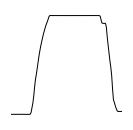

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204251153-1min.png
402 of 480 complete ........................



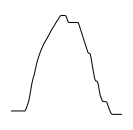

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204251437-1min.png
403 of 480 complete ........................



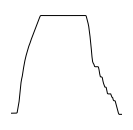

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204251748-1min.png
404 of 480 complete ........................



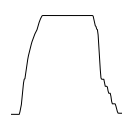

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204260433-1min.png
405 of 480 complete ........................



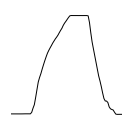

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204260813-1min.png
406 of 480 complete ........................



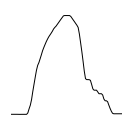

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204261004-1min.png
407 of 480 complete ........................



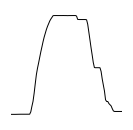

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204261227-1min.png
408 of 480 complete ........................



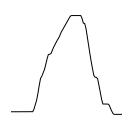

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204261445-1min.png
409 of 480 complete ........................



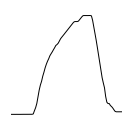

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204261800-1min.png
410 of 480 complete ........................



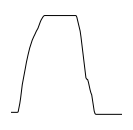

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204270555-1min.png
411 of 480 complete ........................



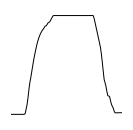

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204270903-1min.png
412 of 480 complete ........................



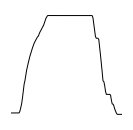

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204271155-1min.png
413 of 480 complete ........................



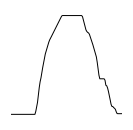

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204271543-1min.png
414 of 480 complete ........................



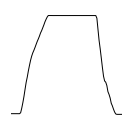

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204280516-1min.png
415 of 480 complete ........................



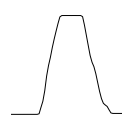

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204280753-1min.png
416 of 480 complete ........................



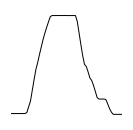

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204280932-1min.png
417 of 480 complete ........................



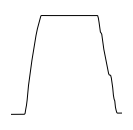

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204281108-1min.png
418 of 480 complete ........................



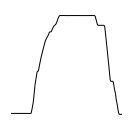

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204281417-1min.png
419 of 480 complete ........................



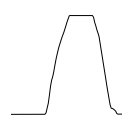

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204281733-1min.png
420 of 480 complete ........................



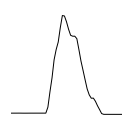

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204290709-1min.png
421 of 480 complete ........................



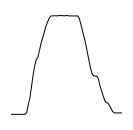

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204290826-1min.png
422 of 480 complete ........................



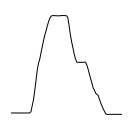

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204291033-1min.png
423 of 480 complete ........................



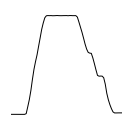

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204291242-1min.png
424 of 480 complete ........................



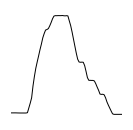

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204291434-1min.png
425 of 480 complete ........................



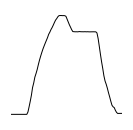

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204291645-1min.png
426 of 480 complete ........................



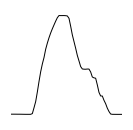

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204300537-1min.png
427 of 480 complete ........................



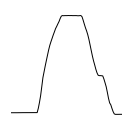

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204300750-1min.png
428 of 480 complete ........................



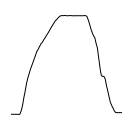

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204301021-1min.png
429 of 480 complete ........................



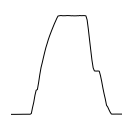

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204301215-1min.png
430 of 480 complete ........................



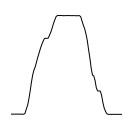

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204301425-1min.png
431 of 480 complete ........................



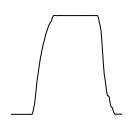

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200204301736-1min.png
432 of 480 complete ........................



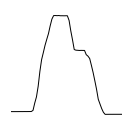

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205010435-1min.png
433 of 480 complete ........................



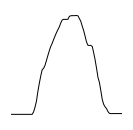

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205010654-1min.png
434 of 480 complete ........................



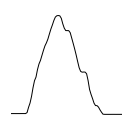

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205010855-1min.png
435 of 480 complete ........................



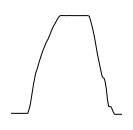

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205011119-1min.png
436 of 480 complete ........................



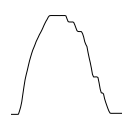

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205011345-1min.png
437 of 480 complete ........................



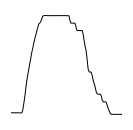

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205020509-1min.png
438 of 480 complete ........................



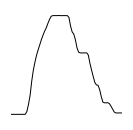

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205020752-1min.png
439 of 480 complete ........................



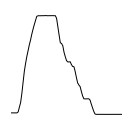

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205021036-1min.png
440 of 480 complete ........................



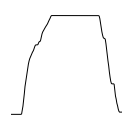

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205021305-1min.png
441 of 480 complete ........................



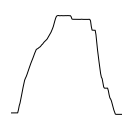

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205021635-1min.png
442 of 480 complete ........................



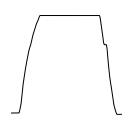

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205030536-1min.png
443 of 480 complete ........................



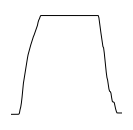

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205030909-1min.png
444 of 480 complete ........................



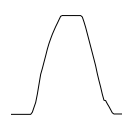

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205031300-1min.png
445 of 480 complete ........................



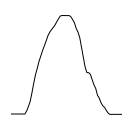

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205031503-1min.png
446 of 480 complete ........................



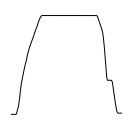

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205040418-1min.png
447 of 480 complete ........................



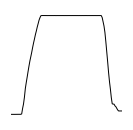

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205040744-1min.png
448 of 480 complete ........................



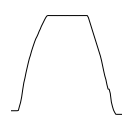

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205041036-1min.png
449 of 480 complete ........................



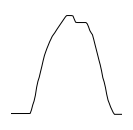

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205041346-1min.png
450 of 480 complete ........................



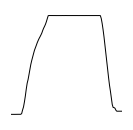

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205041959-1min.png
451 of 480 complete ........................



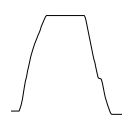

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205050529-1min.png
452 of 480 complete ........................



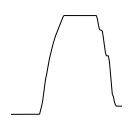

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205050832-1min.png
453 of 480 complete ........................



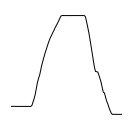

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205051058-1min.png
454 of 480 complete ........................



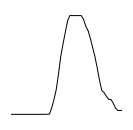

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205051401-1min.png
455 of 480 complete ........................



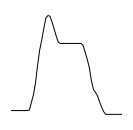

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205051522-1min.png
456 of 480 complete ........................



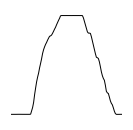

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205051730-1min.png
457 of 480 complete ........................



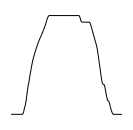

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205060625-1min.png
458 of 480 complete ........................



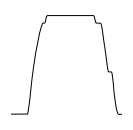

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205060900-1min.png
459 of 480 complete ........................



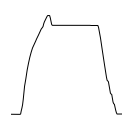

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205061208-1min.png
460 of 480 complete ........................



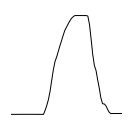

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205061625-1min.png
461 of 480 complete ........................



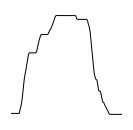

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205061756-1min.png
462 of 480 complete ........................



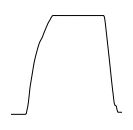

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205062047-1min.png
463 of 480 complete ........................



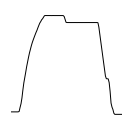

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205070526-1min.png
464 of 480 complete ........................



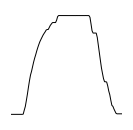

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205070908-1min.png
465 of 480 complete ........................



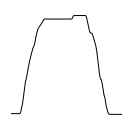

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205071151-1min.png
466 of 480 complete ........................



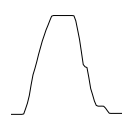

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205071523-1min.png
467 of 480 complete ........................



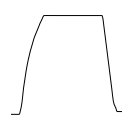

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205071957-1min.png
468 of 480 complete ........................



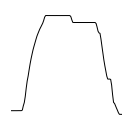

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205080526-1min.png
469 of 480 complete ........................



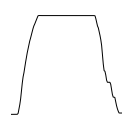

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205080927-1min.png
470 of 480 complete ........................



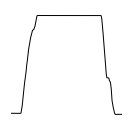

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205081207-1min.png
471 of 480 complete ........................



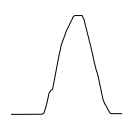

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205081531-1min.png
472 of 480 complete ........................



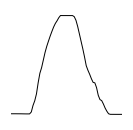

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205081706-1min.png
473 of 480 complete ........................



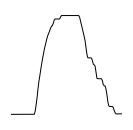

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205090547-1min.png
474 of 480 complete ........................



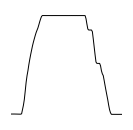

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205090952-1min.png
475 of 480 complete ........................



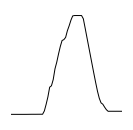

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205091308-1min.png
476 of 480 complete ........................



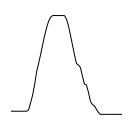

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205091449-1min.png
477 of 480 complete ........................



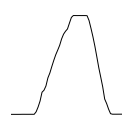

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205100604-1min.png
478 of 480 complete ........................



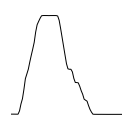

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205100802-1min.png
479 of 480 complete ........................



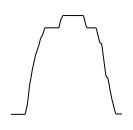

/content/gdrive/My Drive/dashlink/Test/png3/typ/687200205101007-1min.png
480 of 480 complete ........................



In [50]:
allFiles = glob.glob(str(infpath/outpath/'typ'/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO SHOW IN typ FOLDER: {n}\n')
for i,file_ in enumerate(allFiles):
    #if i==5: break
        
    display(Image(filename=file_))
    print(file_)
    
    print(f'{i+1} of {n} complete ........................\n')

TOTAL FILES TO SHOW IN non FOLDER: 34



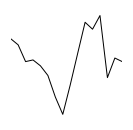

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201040640-1min.png
1 of 34 complete ........................



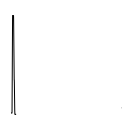

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201041640-1min.png
2 of 34 complete ........................



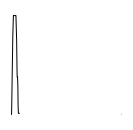

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201051725-1min.png
3 of 34 complete ........................



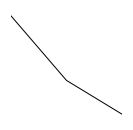

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201070932-1min.png
4 of 34 complete ........................



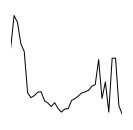

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201181433-1min.png
5 of 34 complete ........................



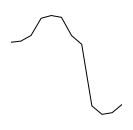

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201220811-1min.png
6 of 34 complete ........................



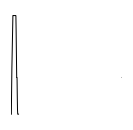

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201221608-1min.png
7 of 34 complete ........................



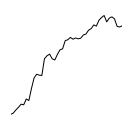

/content/gdrive/My Drive/dashlink/Test/png3/non/687200201271702-1min.png
8 of 34 complete ........................



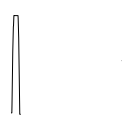

/content/gdrive/My Drive/dashlink/Test/png3/non/687200202031709-1min.png
9 of 34 complete ........................



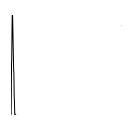

/content/gdrive/My Drive/dashlink/Test/png3/non/687200202041706-1min.png
10 of 34 complete ........................



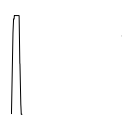

/content/gdrive/My Drive/dashlink/Test/png3/non/687200202061705-1min.png
11 of 34 complete ........................



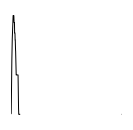

/content/gdrive/My Drive/dashlink/Test/png3/non/687200202091529-1min.png
12 of 34 complete ........................



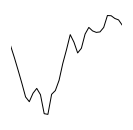

/content/gdrive/My Drive/dashlink/Test/png3/non/687200202101706-1min.png
13 of 34 complete ........................



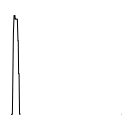

/content/gdrive/My Drive/dashlink/Test/png3/non/687200202111528-1min.png
14 of 34 complete ........................



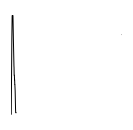

/content/gdrive/My Drive/dashlink/Test/png3/non/687200202161659-1min.png
15 of 34 complete ........................



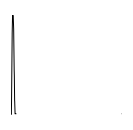

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203081627-1min.png
16 of 34 complete ........................



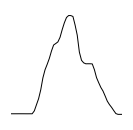

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203101714-1min.png
17 of 34 complete ........................



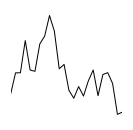

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203211357-1min.png
18 of 34 complete ........................



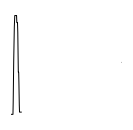

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203231654-1min.png
19 of 34 complete ........................



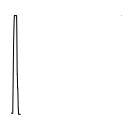

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203241624-1min.png
20 of 34 complete ........................



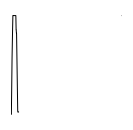

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203261651-1min.png
21 of 34 complete ........................



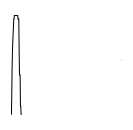

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203271534-1min.png
22 of 34 complete ........................



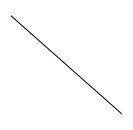

/content/gdrive/My Drive/dashlink/Test/png3/non/687200203281149-1min.png
23 of 34 complete ........................



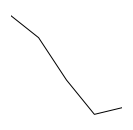

/content/gdrive/My Drive/dashlink/Test/png3/non/687200204021937-1min.png
24 of 34 complete ........................



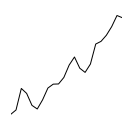

/content/gdrive/My Drive/dashlink/Test/png3/non/687200204030944-1min.png
25 of 34 complete ........................



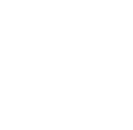

/content/gdrive/My Drive/dashlink/Test/png3/non/687200204230802-1min.png
26 of 34 complete ........................



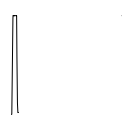

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205011628-1min.png
27 of 34 complete ........................



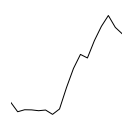

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205022012-1min.png
28 of 34 complete ........................



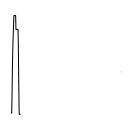

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205031712-1min.png
29 of 34 complete ........................



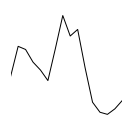

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205041247-1min.png
30 of 34 complete ........................



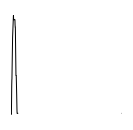

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205041604-1min.png
31 of 34 complete ........................



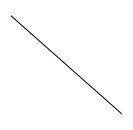

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205051452-1min.png
32 of 34 complete ........................



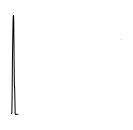

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205071707-1min.png
33 of 34 complete ........................



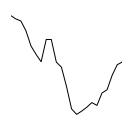

/content/gdrive/My Drive/dashlink/Test/png3/non/687200205080756-1min.png
34 of 34 complete ........................



In [51]:
allFiles = glob.glob(str(infpath/outpath/'non'/'*.png'))
n = len(allFiles)
print(f'TOTAL FILES TO SHOW IN non FOLDER: {n}\n')
for i,file_ in enumerate(allFiles):
    #if i==5: break
        
    display(Image(filename=file_))
    print(file_)
    
    print(f'{i+1} of {n} complete ........................\n')

In [0]:
# manually evaluated test error (i.e. not validation)
# error rate = 9+0/111 = 0.081 = 8.1%